# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

**Before starting with this lab, here is a quick reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating).**

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [1]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [2]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [3]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [4]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. Write code to generate two bar plots that visualize this information, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

In [5]:
training_data.groupby('party').size()

party
C      865
KD     743
L      719
M     2370
MP    1481
S     4261
SD    1010
V      894
dtype: int64

In [6]:
test_data.groupby('party').size()

party
C      671
KD     821
L      560
M     1644
MP     809
S     2773
SD    1060
V      950
dtype: int64

[Text(0.5, 1.0, 'Speeches in 2018-19')]

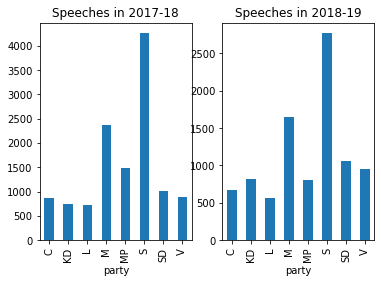

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
training_data.groupby('party').size().plot(ax = ax[0], subplots = True, kind = 'bar')
ax[0].set(title = "Speeches in 2017-18")

test_data.groupby('party').size().plot(ax = ax[1], subplots = True, kind = 'bar')
ax[1].set(title = "Speeches in 2018-19")

*After observing both the bar plots, we see that party S(Socialdemokraterna) has most number of speeches during both periods, while the party L(Liberalerna) has the least during both the periods. The party M(Moderaterna) secures the second spot in both the periods in terms of count of speeches. However, other parties shuffle their positions but seem to have around 1000 speeches in both the periods. The number of speeches is dominated by the 2 parties that held the most number of seats in the riksdag. The total number of speeches given was lower in the following period for all except Cristian Democrats, Left party and Sweden Democrats. These are also the parties that gained seats in 2018 vs 2014. The biggest fall in seats due to election results was for the 2 biggest parties i.e. Swedish Social Democratic Party and the Moderate party. These 2 parties also have the highest frequency of speeches given in the training and test data.*

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

In [8]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('classifier', MultinomialNB()),])

classifier1 = pipe.fit(training_data['words'], training_data['party'])


In [9]:
predictions1 = classifier1.predict(test_data['words'])

In [10]:
print(classification_report(test_data['party'], predictions1))

              precision    recall  f1-score   support

           C       0.63      0.04      0.07       671
          KD       0.70      0.02      0.03       821
           L       0.92      0.02      0.04       560
           M       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           S       0.46      0.84      0.59      2773
          SD       0.57      0.12      0.20      1060
           V       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

*The accuracy of the Naive Bayes model is 43%. Falling back to oiur earlier observation about the data set in general, we saw that the number of speeches made are dominated by 2 class labels i.e. 2 parties S & M. Since the dataset is skewed, the model classifier scores low in precision for the 2 skewed classes. When you factor in the result that the 3 of smallest classes i.e. C, KD & L, all score very low in recall, alongwith the support for each predicted class, we can get a sense of what is happening. The classifier is frequently predicting the 2 most frequent classes which is giving us a skewed classifier. As a result, we should look at the F1 score which is 24% for this model.*

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). What is the performance of the random baseline on the test data?

In [11]:
# TODO: Write code here to evaluate the random baseline
from sklearn.dummy import DummyClassifier

DC = DummyClassifier(strategy = 'stratified') 
# stratified method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities

DC.fit(training_data['words'], training_data['party'])

DC.predict(test_data['words'])

print("Rand Sampling Dummy Classifier accuracy on test data:", DC.score(test_data['words'], test_data['party']))

Rand Sampling Dummy Classifier accuracy on test data: 0.17506459948320413


An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline. What is the accuracy of that baseline on the test data?

In [12]:
# TODO: Write code here to print the accuracy of the most frequent class baseline

DC = DummyClassifier(strategy = 'most_frequent') 
# most_frequent method always returns the most frequent class label in the observed y argument passed to fit
DC.fit(training_data['words'], training_data['party'])

DC.predict(test_data['words'])

print("MFreq Dummy Classifier accuracy on test data:", DC.score(test_data['words'], test_data['party']))

MFreq Dummy Classifier accuracy on test data: 0.298557278208441


## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [13]:
# TODO: Write code here to implement undersampling
min_samples = min(training_data.groupby('party').size())
new_training_data = pd.DataFrame()

for i in parties:
    df_party = training_data[training_data.party == i]
    df_party = df_party.sample(min_samples)
    new_training_data = new_training_data.append(df_party)

In [14]:
new_training_data = new_training_data.reset_index(drop = True)
new_training_data

,id,words,party
0,H5-096-014,fru talman natomedlemskap är naturligtvis inte...,C
1,H5-050-026,fru talman det lackar mot jul jag tror att vi ...,C
2,H5-008-007,herr talman under minst fyra riksdagsår har ja...,C
3,H5-031-081,fru talman de nationella proven tror jag föder...,C
4,H5-056-018,herr talman jag hoppas att statsministern känn...,C
...,...,...,...
5747,H5-125-031,herr talman jag yrkar också bifall till reserv...,V
5748,H5-007-074,herr talman i danderyds nyheter kan vi läsa om...,V
5749,H5-136-042,herr talman när beslutet om att inleda vinstex...,V
5750,H5-015-050,herr talman det finns en tydlig orsak till att...,V


In [15]:
new_training_data.groupby('party').size()

party
C     719
KD    719
L     719
M     719
MP    719
S     719
SD    719
V     719
dtype: int64

In [16]:
classifier2 = pipe.fit(new_training_data['words'], new_training_data['party'])
predictions2 = classifier2.predict(test_data['words'])
print(classification_report(test_data['party'], predictions2))

              precision    recall  f1-score   support

           C       0.27      0.44      0.34       671
          KD       0.28      0.39      0.33       821
           L       0.26      0.46      0.33       560
           M       0.40      0.49      0.44      1644
          MP       0.36      0.37      0.37       809
           S       0.81      0.30      0.44      2773
          SD       0.46      0.40      0.43      1060
           V       0.40      0.55      0.46       950

    accuracy                           0.40      9288
   macro avg       0.41      0.43      0.39      9288
weighted avg       0.50      0.40      0.41      9288



*The overall accuracy drops for the latest classifier trained using the balanced dataset. This is to be expected since, the earlier higher accuracy was due to the 2 largest classes getting more true-positives because the earlier classifier was predicting the skewed classes. This classifier gives a more balanced result, as the false negatives of each of the classes is more balanced, the recall score is more balanced for each class. Although, now the precision for the unbalanced class in the test set (i.e. S) is higher because its frequency is still skewed and hence, false-positives are lower. Overall, this is still a better classifier even with lower accuracy, since the harmonic mean is balancing between recall and precision for most classes. Also, sticking to our previous conclusion to look at the F1 score, we see a significant improvement up to 39% which supports our conclusion that this trained classifier is a big improvement.*

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). If you would rather see a visual representation, you can also use [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

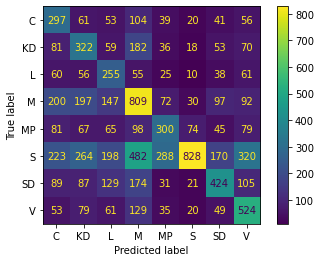

In [17]:
# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(classifier2, test_data['words'], test_data['party'])

#print(confusion_matrix(test_data['party'], predictions2,  labels = parties))

Take a minute to reflect on whether your results make sense.

*While precision for S is pretty high, this skewed frequency results is a naturally high false negative rate. In case of M, which is the 2nd largest skew in the test set, we see that a lot of S labels have been misclassified as M. For the smallest classes C, LD & L, all of them are getting misclassified as M. And vice versa, the top 3 misclassifications for M labels are that of C, KD and L. The correlation between these parties makes sense since, 3 of them except KD have liberal views and KD has been known to hold support opposing ideologies. So the classifier maybe picking commonalities in their speeches. The other strong correlation we can see is between S, V and MP. This also makes sense considering the common ideology around socialism for the 3 parties. For SD, we see that a lot of misclassification is with liberals and moderates followed by left. which again hints to common themes in speeches even if the sentiment maybe opposite.*

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library. Print the results of your best model, along with the parameter values that yielded these results.

In [18]:
# TODO: Write code here to implement the grid search
from sklearn.model_selection import GridSearchCV

parameters = [{'vector__binary':(True, False),
              'vector__ngram_range':((1,1),(2,2)),
              'classifier__alpha':(1,0.1)}]

GSCV = GridSearchCV(pipe, parameters, n_jobs = -1)
classifier3 = GSCV.fit(training_data['words'], training_data['party'])
prediction3 = classifier3.predict(test_data['words'])

In [19]:
classifier3.best_params_

{'classifier__alpha': 0.1,
 'vector__binary': False,
 'vector__ngram_range': (1, 1)}

In [20]:
print(classification_report(test_data['party'], prediction3))

              precision    recall  f1-score   support

           C       0.39      0.27      0.32       671
          KD       0.45      0.24      0.31       821
           L       0.37      0.26      0.30       560
           M       0.44      0.58      0.50      1644
          MP       0.32      0.46      0.38       809
           S       0.61      0.65      0.63      2773
          SD       0.49      0.43      0.45      1060
           V       0.50      0.42      0.46       950

    accuracy                           0.48      9288
   macro avg       0.45      0.41      0.42      9288
weighted avg       0.48      0.48      0.48      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.

In [21]:
# TODO: Write code here to search for a better model and print the results

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
pipe2 = Pipeline([
    ('vector', TfidfVectorizer()),
    ('classifier', LogisticRegression()),])

classifier4 = pipe2.fit(new_training_data['words'], new_training_data['party'])
predictions4 = classifier4.predict(test_data['words'])
print(classification_report(test_data['party'], predictions4))

              precision    recall  f1-score   support

           C       0.32      0.46      0.38       671
          KD       0.35      0.32      0.33       821
           L       0.31      0.42      0.36       560
           M       0.55      0.35      0.43      1644
          MP       0.28      0.49      0.35       809
           S       0.69      0.47      0.56      2773
          SD       0.39      0.53      0.45      1060
           V       0.46      0.47      0.46       950

    accuracy                           0.44      9288
   macro avg       0.42      0.44      0.42      9288
weighted avg       0.49      0.44      0.45      9288



*Slight improvement in model F1 score by using logistic Regression classifier and TfidfVectorizer on balanced dataset, but the improvement could be further enhanced by using CV*

In [23]:
from sklearn.linear_model import LogisticRegressionCV

pipe3 = Pipeline([
    ('vector', TfidfVectorizer()),
    ('classifier', LogisticRegressionCV(max_iter = 500)),])

classifier5 = pipe3.fit(new_training_data['words'], new_training_data['party'])
predictions5 = classifier5.predict(test_data['words'])
print(classification_report(test_data['party'], predictions5))

              precision    recall  f1-score   support

           C       0.35      0.46      0.40       671
          KD       0.36      0.36      0.36       821
           L       0.31      0.46      0.37       560
           M       0.54      0.41      0.46      1644
          MP       0.28      0.47      0.35       809
           S       0.69      0.49      0.57      2773
          SD       0.44      0.53      0.48      1060
           V       0.50      0.47      0.49       950

    accuracy                           0.46      9288
   macro avg       0.43      0.46      0.43      9288
weighted avg       0.50      0.46      0.47      9288



*We are able to improve the classifier beyond the results we saw with GridSearchCV*

In [24]:
from sklearn.svm import SVC

pipe4 = Pipeline([
    ('vector', TfidfVectorizer()),
    ('classifier', SVC(decision_function_shape = 'ovo')),])

classifier6 = pipe4.fit(new_training_data['words'], new_training_data['party'])
predictions6 = classifier6.predict(test_data['words'])
print(classification_report(test_data['party'], predictions6))

              precision    recall  f1-score   support

           C       0.31      0.46      0.37       671
          KD       0.34      0.29      0.31       821
           L       0.32      0.42      0.36       560
           M       0.54      0.35      0.43      1644
          MP       0.29      0.52      0.37       809
           S       0.70      0.46      0.56      2773
          SD       0.36      0.55      0.44      1060
           V       0.48      0.44      0.46       950

    accuracy                           0.44      9288
   macro avg       0.42      0.44      0.41      9288
weighted avg       0.49      0.44      0.45      9288



*No improvement by using SVC over LogisticRegression classifier.*

In [25]:
#pipeline of feature engineering and model
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer

sgd_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(tol=1e-3))])
sgd_parameters_grid = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

# Model and fit with grid search
gs_sgd_clf = GridSearchCV(sgd_clf, sgd_parameters_grid, cv=5, n_jobs=-1, verbose=1)
gs_sgd_clf.fit(training_data.words, training_data.party)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best score: 0.6603719181054147
Parameters of the best model:
N-Gram range: (1, 2)
Alpha val: 1e-05


NameError: name 'accuracy_score' is not defined

In [26]:
# Print the results of your best model, along with the parameter values that yielded these results.
print(f'The best score: {gs_sgd_clf.best_score_}')
print('Parameters of the best model:')
print(f'N-Gram range:', gs_sgd_clf.best_params_['vect__ngram_range'])
print(f'Alpha val:', gs_sgd_clf.best_params_['clf__alpha'])

# Prediction
gs_sgd_clf_pred = gs_sgd_clf.predict(test_data.words)

# Classification report
class_report_sgd = classification_report(test_data.party, gs_sgd_clf_pred)
print(class_report_sgd)

The best score: 0.6603719181054147
Parameters of the best model:
N-Gram range: (1, 2)
Alpha val: 1e-05
              precision    recall  f1-score   support

           C       0.58      0.40      0.47       671
          KD       0.56      0.30      0.39       821
           L       0.52      0.38      0.44       560
           M       0.51      0.64      0.57      1644
          MP       0.39      0.41      0.40       809
           S       0.60      0.80      0.68      2773
          SD       0.64      0.47      0.54      1060
           V       0.66      0.40      0.50       950

    accuracy                           0.56      9288
   macro avg       0.56      0.48      0.50      9288
weighted avg       0.57      0.56      0.55      9288



*Best result found with gridsearchCV using a SGD classifier which gave us a f1 score of 50%!*

*Note: gridsearchCV took a VERY long time to tune hyperparams.*

## Reflection questions

The following reflection questions will help you prepare for the diagnostic test. Answer each of them in the form of a short text and put your answers in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 2.1:** Summarise the results of your experiments for Problem&nbsp;2. Are your results ‘good’ or ‘bad’? How do you determine that?

*Most of results were summarized above, but some concluding remarks are as follows:*
- *The model accuracy is not the correct measure as we are dealing with a unbalanced dataset.*
- *We should look at the F1 score which gives a clearer picture and tells us that the model is only 29% 'good'*

**RQ 2.2:** Summarise the results of your experiments for Problem&nbsp;4. Would you think that your results are typical even for other classification tasks? How would *oversampling* have looked like for this task? When would you use undersampling, when oversampling?

*Result summary was completed earlier. We feel that the results of the classification task would be the similar if the task was classifying something else say, images. Undersampling or oversampling are both essentially random sampling techniques which introduce a bias in our dataset to select 1 class more than the other. The datatype should not hinder the classification result for a different kind of task.* 

*On the question about oversampling, we would say that it depends on what kind of oversampling technique we would use. For eg, if we use random oversampling instead of random undersampling as we used here, then some samples of the minority classes would be duplicated over and over again to balance the classes. It would bias the data and increase the importance of some text/words more than others. A potential problem that can arise is that because this classification exercise lacks CONTEXT modelling, a lot of correlation that we saw between speeches of parties which focus on similar agendas can get amplified and we may see misclassification between parties that have a high correlation of speech data. If we use some other oversampling technique like SMOTE then we may avoid overfitting and correlation led issues because then we would be not be resampling the text speeches but rather the vector representations and their nearest neighbors. This might lead to slightly better results.*

*We would mostly use undersampling when we want to avoid computational overheads. Oversampling would be a preferred option because it allows us to train the model on the maximum possible data. In htis case by using random undersampling, we have to accepted the fact that we may be leaving out some important samples from our training.*

**RQ 2.3:** Which model performed best in your experiments for Problem&nbsp;6? Why is it important to do a hyperparameter search before drawing conclusions about the performance of a model? Why is it often not done, anyway? Why should you never tune hyperparameters on the test set?

*We were able to improve the model f1 score from 0.39 to 0.42, the results of the grid search CV were shared above. Verbosely, the setting that led to a better result were: additive smoothing parameter, $\alpha = 0.1$, bag-of-words assumption: only unigrams i.e. (1,1); and set-of-words model: False i.e. the importance of the frequency of the words results in a better model than just occurance of a word. Hyperparameter tuning is important because the data being used to train the model can be sensitive to different values of the parameters of functions at various steps like pre-processing, fitting etc. To maximize the performance of a model, we should try to find the optimum parameters which can give us the highest accuracy scores on the validation data. Tuning hyperparameters can be cumbersome and computationally expensive. For eg, while training the logistic regression classifier with CV in problem7, I had to wait for a very long time for convergence and that too didn't give me a manifold increase in the model accuracy. Finally, hyperparameter tuning should always be done a validation set and the test set should be reserved for final testing. Test data is supposed to be unseen that gives us the closest view on how the model will perform on unseen real world data. If we tune on test data, it may improve the performance on the current data but the model may perform worse when it is put into production.*

*TODO: Enter your answers here*

**Congratulations on finishing L2! 👍**